### Import Libraries

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

### Read Data

In [2]:
df_tweets = pd.read_csv("twitter_sentiments.csv")
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 7 columns):
ItemID             65499 non-null int64
Sentiment          65499 non-null int64
SentimentSource    65499 non-null object
SentimentText      65499 non-null object
Unnamed: 4         0 non-null float64
Unnamed: 5         0 non-null float64
Unnamed: 6         0 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.5+ MB


In [3]:
df_tweets.head(3)

,ItemID,Sentiment,SentimentSource,SentimentText,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,0,Sentiment140,is so sad for my APL frie...,NaN,NaN,NaN
1,2,0,Sentiment140,I missed the New Moon trail...,NaN,NaN,NaN
2,3,1,Sentiment140,omg its already 7:30 :O,NaN,NaN,NaN


In [4]:
del df_tweets["SentimentSource"]
del df_tweets["Unnamed: 4"]
del df_tweets["Unnamed: 5"]
del df_tweets["Unnamed: 6"]

In [5]:
df_tweets.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at...
4,5,0,i think mi bf is cheating on me!!! ...


In [6]:
pd.options.display.max_colwidth = 100

In [7]:
df_tweets[df_tweets["Sentiment"] == 1][["SentimentText","Sentiment"]].head(5)

,SentimentText,Sentiment
2,omg its already 7:30 :O,1
6,Juuuuuuuuuuuuuuuuussssst Chillin!!,1
8,handed in my uniform today . i miss you already,1
9,hmmmm.... i wonder how she my number @-),1
11,thanks to all the haters up in my face all day! 112-102,1


In [8]:
df_tweets[df_tweets["Sentiment"] == 0][["SentimentText","Sentiment"]].head(5)

,SentimentText,Sentiment
0,is so sad for my APL friend.............,0
1,I missed the New Moon trailer...,0
3,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get ...,0
4,i think mi bf is cheating on me!!! T_T,0
5,or i just worry too much?,0


### Data Preprocessing

In [9]:
# convert to lower case
df_tweets['clean_tweet'] = df_tweets['SentimentText'].str.lower()
# Remove punctuations
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].str.replace('[^\w\s]',' ')
# Remove spaces in between words
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].str.replace(' +', ' ')
# Remove Numbers
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].str.replace('\d+', '')
# Remove trailing spaces
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].str.strip()
# Remove URLS
df_tweets['clean_tweet'] = df_tweets['clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
# remove stop words
stop = stopwords.words('english')
stop.extend(["racism","alllivesmatter","amp","https","co","like","people","black","white"])
df_tweets['clean_tweet'] =  df_tweets['clean_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop ))

In [10]:
df_tweets.head()

,ItemID,Sentiment,SentimentText,clean_tweet
0,1,0,is so sad for my APL friend.............,sad apl friend
1,2,0,I missed the New Moon trailer...,missed new moon trailer
2,3,1,omg its already 7:30 :O,omg already
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get ...,omgaga im sooo im gunna cry dentist since suposed get crown put mins
4,5,0,i think mi bf is cheating on me!!! T_T,think mi bf cheating t_t


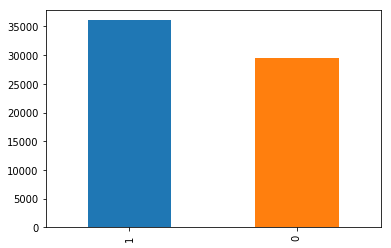

In [11]:
df_tweets.Sentiment.value_counts().plot("bar")

### Split Dataset

In [12]:
# train test split
df_train, df_test = train_test_split(df_tweets, test_size = 0.2, stratify = df_tweets['Sentiment'], random_state=21)

# get the shape of train and test split.
print(df_train.shape, df_test.shape)


(52399, 4) (13100, 4)


### Create TF-IDF Vector

In [13]:
# create a TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer(lowercase= True, max_features=1000, stop_words=ENGLISH_STOP_WORDS)

# fit the object with the training data tweets
tfidf_vectorizer.fit(df_train.clean_tweet)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=frozenset({'side', 'whereupon', 'under', 'twenty', 'with', 'nobody', 'something', 'whenever', 'afterwards', 'indeed', 'since', 'themselves', 'while', 'on', 'whatever', 'name', 'becoming', 'back', 'whither', 'become', 'meanwhile', 'eg', 'us', 'put', 'same', 'hasnt', 'otherwise', 'everywher...lve', 'so', 'fifteen', 'will', 'mine', 'elsewhere', 'your', 'alone', 'mill', 'already', 'describe'}),
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [14]:
# transform the train and test data
train_idf = tfidf_vectorizer.transform(df_train.clean_tweet)
test_idf  = tfidf_vectorizer.transform(df_test.clean_tweet)

In [15]:
train_idf

<52399x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 189442 stored elements in Compressed Sparse Row format>

### Prepare Logistic Regression Model

In [16]:
# create the object of Logistic Regression Model
model_LR = LogisticRegression()

# fit the model with the training data
model_LR.fit(train_idf, df_train.Sentiment)

# predict the label on the traning data
predict_train = model_LR.predict(train_idf)

# predict the model on the test data
predict_test = model_LR.predict(test_idf)

# f1 score on train data
print(f1_score(y_true= df_train.Sentiment, y_pred= predict_train))


print(f1_score(y_true= df_test.Sentiment, y_pred= predict_test))



/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7756614274755586
0.7609870434273065


### Prepare Random Forest Model

In [17]:
# create the object of Random Forest Model
model_RF = RandomForestClassifier(n_estimators=100)

# fit the model with the training data
model_RF.fit(train_idf, df_train.Sentiment)

# predict the label on the traning data
predict_train = model_RF.predict(train_idf)

# predict the model on the test data
predict_test = model_RF.predict(test_idf)

# f1 score on train data
print(f1_score(y_true= df_train.Sentiment, y_pred= predict_train))


print(f1_score(y_true= df_test.Sentiment, y_pred= predict_test))




0.9439373745212829
0.7446455805317951


### Define Pipeline Stages

In [18]:
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=1000,
                                                      stop_words= ENGLISH_STOP_WORDS)),
                            ('model', RandomForestClassifier(n_estimators = 100))])

# fit the pipeline model with the training data                            
pipeline.fit(df_train.clean_tweet, df_train.Sentiment)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

### Dump the Pipeline Model

In [19]:
# import joblib
from joblib import dump

# dump the pipeline model
dump(pipeline, filename="text_classification.joblib")

['text_classification.joblib']

### Test The Model

In [20]:
# import joblib
from joblib import load

# sample tweet text
text = ["The IRS estimates that undocumented immigrants pay over $9 billion in withheld payroll taxes annually.Yes #DonaldTrump please continue your conversation about these caravans full of leeches just trying to take our hard earned money...#TrumpTaxReturns #Trump750 #MondayMorning"]

# load the saved pipleine model
pipeline = load("text_classification.joblib")

# predict on the sample tweet text
pipeline.predict(text)


array([0])

In [21]:
# sample tweet
text = ["Nevada / Las Vegas: Come join me tonight at Pahrump Winery for a #MAGA event in support of @realDonaldTrump! Doors open at 4pm. Let’s #KeepAmericaGreat #TeamTrump"]
# predict the label using the pipeline
pipeline.predict(text)


array([1])

### Connect Twitter and search for a Keyword

In [22]:
import tweepy
import config
    
# initialize api instance\n
consumer_key= config.consumer_key
consumer_secret= config.consumer_secret
access_token=config.access_token
access_token_secret =config.access_token_secret

#Connect to Twitter through the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit=True) 


In [23]:
def get_related_tweets(search_keyword):
    ''' collect tweets '''
    try: 
        count = 50
        # Create Blank Dataframe\n",
        df_tweets = pd.DataFrame(pd.np.empty((0, 1)))
        for keyword in search_keyword:
            # Remove Retweets
            search_tag = keyword +  "-filter:retweets" +  "-filter:media"
            
            print('Searching tweets for: ', search_tag)
    
            fetched_tweets = tweepy.Cursor(api.search,
                                q=search_tag,
                                lang="en").items(50)
            # Add records to the dataframe
            df_tweets = df_tweets.append([[tweet.text] for tweet in fetched_tweets])
            # Add columns
            df_tweets.columns = ['tweets']
            #clean emojis and pictures from tweets
            df_tweets['tweets'] = df_tweets['tweets'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
            # Retuen Data
            return(df_tweets)
    except Exception as e:
        print('Encountered Exception:', e)
        return None

### Test The Model for a hashtag

In [24]:
from sklearn.pipeline import Pipeline
tweets = get_related_tweets("#USElection2020")
# get the prediction
tweets['prediction'] = pipeline.predict(tweets['tweets'])
tweets.head(20)

Searching tweets for:  #-filter:retweets-filter:media


,tweets,prediction
0,RT @chioma_mmeje: Police tried to arrest one guy at the #AbujaProtests. Everyone formed barricad...,0
1,RT @athie_gnome: @apark2453 Yet again: people simply cannot believe that the 1A is as strong as ...,1
2,@KameaChayne He gave a series of interview over the last 2 years where he says it,1
3,"RT @jbrialarae: if we link AGAIN, you won.",0
4,RT @AloneJust_me: @scenesofriends is my grandpa too https://t.co/cJJkKdjTtZ,1
5,@wetzelart interesting,1
6,@_nishav Okay thank you!,1
7,RT @squishyjinki: Kibums cover of Taemins Criminal https://t.co/XdGci3Q6BO,0
8,RT @stfudanie14: PINOY CHEESE STICK https://t.co/upTUSfC6oQ,0
9,'@BLACKPINK: Light Up The Sky' Is An Unguarded Look Into The World's Biggest Girl Group #blackpi...,1


### Connect webpage and Model

In [25]:
# importing the required libraries
from flask import Flask, render_template, request, redirect, url_for
from joblib import load
#from get_tweets import get_related_tweets


# load the pipeline object
pipeline = load("text_classification.joblib")

# function to get results for a particular text query
def requestResults(search_keyword):
    # get the tweets text
    tweets = get_related_tweets(search_keyword)
    # get the prediction
    tweets['prediction'] = pipeline.predict(tweets['tweets'])
    # get the value counts of different labels predicted
    data = str(tweets.prediction.value_counts()) + '\n\n'
    return data + str(tweets)


In [26]:
# start flask
app = Flask(__name__)

# render default webpage
@app.route('/')
def home():
    return render_template('home.html')

# when the post method detect, then redirect to success function
@app.route('/', methods=['POST', 'GET'])
def get_data():
    if request.method == 'POST':
        user = request.form['search']
        return redirect(url_for('success', name=user))

# get the data for the requested query
@app.route('/success/<name>')
def success(name):
    return "<xmp>" + str(requestResults(name)) + " </xmp> "

In [27]:
if __name__ == '__main__':
    import random, threading, webbrowser

    #port = 5000 + random.randint(0, 999)
    #print(port)
    #url = "http://127.0.0.1:{0}".format(port)
    app.run(use_reloader=False, debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Oct/2020 11:29:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Oct/2020 11:29:53] "POST / HTTP/1.1" 302 -


Searching tweets for:  #-filter:retweets-filter:media


127.0.0.1 - - [13/Oct/2020 11:29:56] "GET /success/%23USElection2020 HTTP/1.1" 200 -
